<a href="https://colab.research.google.com/github/kumudpatel/CodeCasa/blob/Data-Science/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libaries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Upload Datasets**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
df=data.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# check for missing values
total =df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


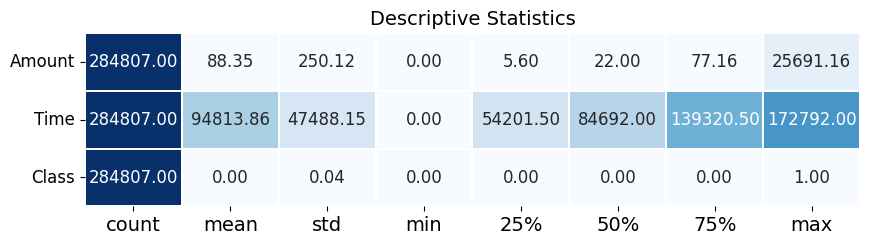

In [ ]:
# statistical summary:
cols =df[["Amount","Time","Class"]]
cmap1 = 'Blues'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()

desc_stats(cols)

In [ ]:
# correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='summer_r')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


In [ ]:
# check for class imbalance
temp = df["Class"].value_counts()
df1 = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df1['Class'],y = df1['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Blue"),
    text=df1['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Class)',
          xaxis = dict(title = 'Class', showticklabels=True),
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

In [ ]:
# making Hour feature from Time feature
df["Hour"] = df["Time"].apply(lambda x: np.ceil(float(x)/3600) % 24)
df["Hour"] = df["Hour"].astype("int")

In [ ]:
# Distribution of Fraud and Normal Transactions

px.pie(df, names="Class", title="Distribution of Fraud and Normal Transactions:(Normal:0 | Fraud:1)", color_discrete_sequence=['#1E90FF', '#FF4500'],
       template="plotly_dark", width=800, height=600)

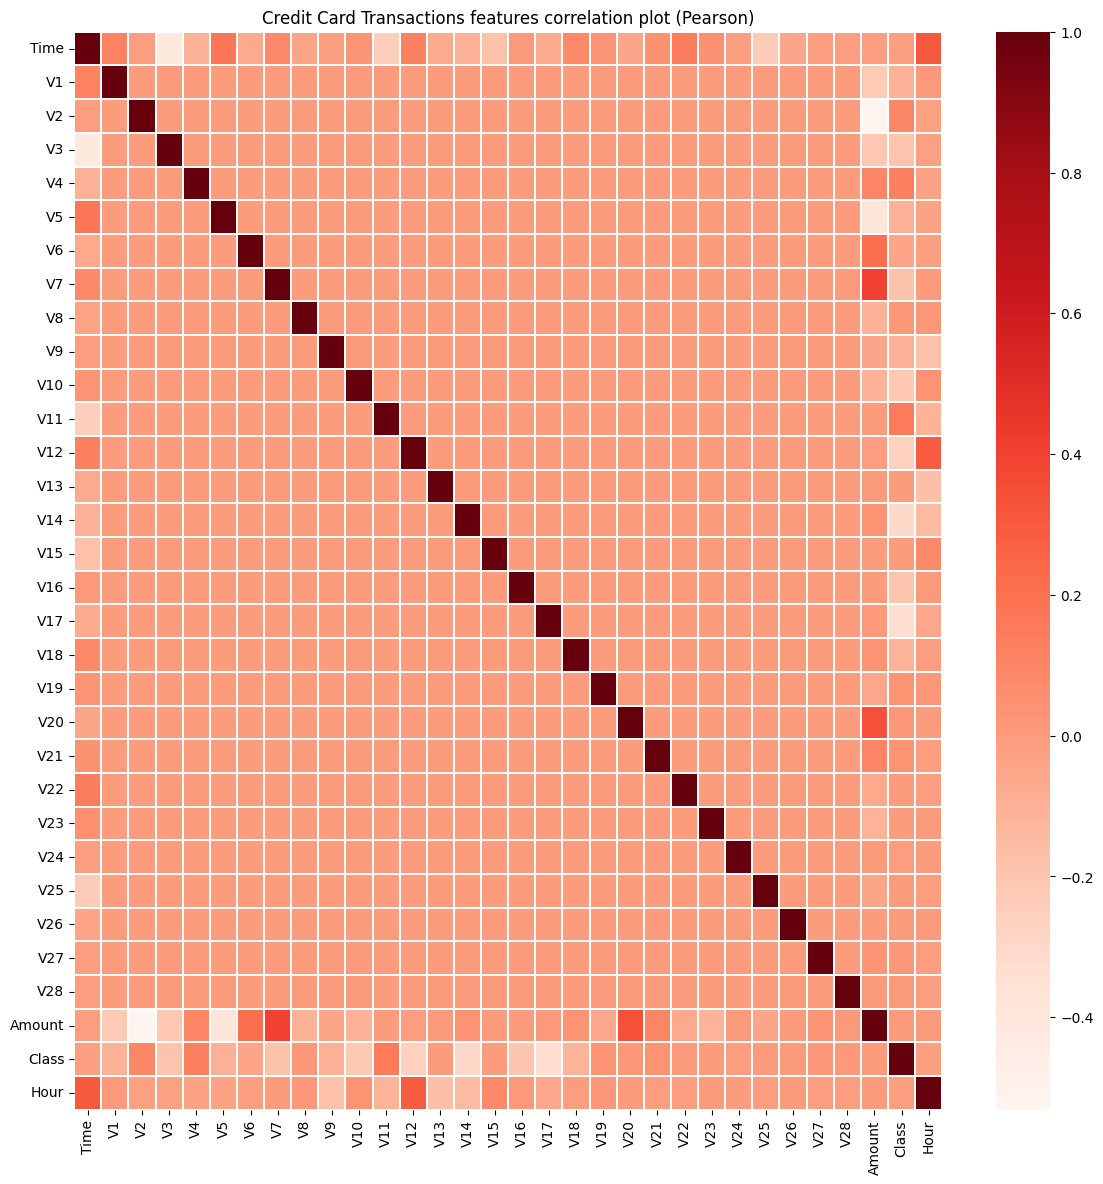

In [ ]:
# correlation heatmap:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [ ]:
# time vs fraud

# Transaction count with non frauds over time(Hour)
count_0 = df[df['Class']==0].groupby('Hour').count()["Class"]

# Transaction count with frauds over time(Hour)
count_1 = df[df['Class']==1].groupby('Hour').count()["Class"]

# Concatenate
counts_df = pd.concat([count_0, count_1], axis=1, keys=["Class 0", "Class 1"]).fillna(0)
df_counts = counts_df.reset_index()


# Subplots
fig = make_subplots(
    rows=1, cols=2,

    subplot_titles=("Non Frauds","Frauds"))
fig.add_trace(go.Scatter(x=df_counts["Hour"], y=df_counts["Class 0"], name="Transactions", marker = {'color' : "#1E90FF"}),
                 row=1, col=1)

fig.add_trace(go.Scatter(x=df_counts["Hour"], y=df_counts["Class 1"], name="Transactions", marker = {'color' : "#FF4500"}),
                 row=1, col=2)

fig['layout']['xaxis']['title']='Hour'
fig['layout']['yaxis']['title']='Transaction'
fig['layout']['xaxis2']['title']='Hour'
fig['layout']['yaxis2']['title']='Transaction'

fig.show()

In [ ]:
X=df.drop(["Class"],axis=1).values
y=df["Class"].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# standardization of data
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**k Nearest Neighbor**

In [ ]:
# model building

knn=KNeighborsClassifier()

models = [knn]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__, "Model Test Accuracy Score is: ", accuracy_score(y_test, y_pred))
    print(type(model).__name__, "Model Test F1 Score is: ", f1_score(y_test, y_pred))
    print(type(model).__name__,"Mean_absolute_error: ",mean_absolute_error(y_test, y_pred))
    print(type(model).__name__,"Mean_squared_error: ",mean_squared_error(y_test, y_pred))
    print(type(model).__name__,"Root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    print(type(model).__name__,"R2_score: ",r2_score(y_test, y_pred))
    print(type(model).__name__,"Classification_report: \n",classification_report(y_test, y_pred))
    fig=px.imshow(confusion_matrix(y_test, y_pred),color_continuous_scale="Viridis",title=type(model).__name__,
                  width=400,height=400,labels=dict(x="Predicted", y="Actual", color="Counts"),template="plotly_dark")
    fig.show()

KNeighborsClassifier Model Test Accuracy Score is:  0.9995084442259752
KNeighborsClassifier Model Test F1 Score is:  0.8426966292134831
KNeighborsClassifier Mean_absolute_error:  0.0004915557740247885
KNeighborsClassifier Mean_squared_error:  0.0004915557740247885
KNeighborsClassifier Root_mean_squared_error:  0.02217105712465665
KNeighborsClassifier R2_score:  0.7137933113594341
KNeighborsClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.77      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



**Support Vector Machine**

In [ ]:
svc=SVC()
models = [svc]


for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__, "Model Test Accuracy Score is: ", accuracy_score(y_test, y_pred))
    print(type(model).__name__, "Model Test F1 Score is: ", f1_score(y_test, y_pred))
    print(type(model).__name__,"Mean_absolute_error: ",mean_absolute_error(y_test, y_pred))
    print(type(model).__name__,"Mean_squared_error: ",mean_squared_error(y_test, y_pred))
    print(type(model).__name__,"Root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    print(type(model).__name__,"R2_score: ",r2_score(y_test, y_pred))
    print(type(model).__name__,"Classification_report: \n",classification_report(y_test, y_pred))
    fig=px.imshow(confusion_matrix(y_test, y_pred),color_continuous_scale="Viridis",title=type(model).__name__,
                  width=400,height=400,labels=dict(x="Predicted", y="Actual", color="Counts"),template="plotly_dark")
    fig.show()

SVC Model Test Accuracy Score is:  0.9993153330290369
SVC Model Test F1 Score is:  0.7577639751552796
SVC Mean_absolute_error:  0.0006846669709630982
SVC Mean_squared_error:  0.0006846669709630982
SVC Root_mean_squared_error:  0.026166141690419285
SVC R2_score:  0.6013549693934976
SVC Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.62      0.76        98

    accuracy                           1.00     56962
   macro avg       0.98      0.81      0.88     56962
weighted avg       1.00      1.00      1.00     56962



**Naive bayes**

In [ ]:
nb=GaussianNB()
models = [nb]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__, "Model Test Accuracy Score is: ", accuracy_score(y_test, y_pred))
    print(type(model).__name__, "Model Test F1 Score is: ", f1_score(y_test, y_pred))
    print(type(model).__name__,"Mean_absolute_error: ",mean_absolute_error(y_test, y_pred))
    print(type(model).__name__,"Mean_squared_error: ",mean_squared_error(y_test, y_pred))
    print(type(model).__name__,"Root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    print(type(model).__name__,"R2_score: ",r2_score(y_test, y_pred))
    print(type(model).__name__,"Classification_report: \n",classification_report(y_test, y_pred))
    fig=px.imshow(confusion_matrix(y_test, y_pred),color_continuous_scale="Viridis",title=type(model).__name__,
                  width=400,height=400,labels=dict(x="Predicted", y="Actual", color="Counts"),template="plotly_dark")
    fig.show()

GaussianNB Model Test Accuracy Score is:  0.9778448790421684
GaussianNB Model Test F1 Score is:  0.11251758087201125
GaussianNB Mean_absolute_error:  0.022155120957831537
GaussianNB Mean_squared_error:  0.022155120957831537
GaussianNB Root_mean_squared_error:  0.14884596386140786
GaussianNB R2_score:  -11.899744323728362
GaussianNB Classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.82      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962



**Decision Tree**

In [ ]:
dtc=DecisionTreeClassifier()
models= [dtc]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__, "Model Test Accuracy Score is: ", accuracy_score(y_test, y_pred))
    print(type(model).__name__, "Model Test F1 Score is: ", f1_score(y_test, y_pred))
    print(type(model).__name__,"Mean_absolute_error: ",mean_absolute_error(y_test, y_pred))
    print(type(model).__name__,"Mean_squared_error: ",mean_squared_error(y_test, y_pred))
    print(type(model).__name__,"Root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    print(type(model).__name__,"R2_score: ",r2_score(y_test, y_pred))
    print(type(model).__name__,"Classification_report: \n",classification_report(y_test, y_pred))
    fig=px.imshow(confusion_matrix(y_test, y_pred),color_continuous_scale="Viridis",title=type(model).__name__,
                  width=400,height=400,labels=dict(x="Predicted", y="Actual", color="Counts"),template="plotly_dark")
    fig.show()

DecisionTreeClassifier Model Test Accuracy Score is:  0.9992099996488887
DecisionTreeClassifier Model Test F1 Score is:  0.7783251231527093
DecisionTreeClassifier Mean_absolute_error:  0.0007900003511112671
DecisionTreeClassifier Mean_squared_error:  0.0007900003511112671
DecisionTreeClassifier Root_mean_squared_error:  0.02810694489109884
DecisionTreeClassifier R2_score:  0.5400249646848049
DecisionTreeClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.81      0.78        98

    accuracy                           1.00     56962
   macro avg       0.88      0.90      0.89     56962
weighted avg       1.00      1.00      1.00     56962



**Random Forest**

In [ ]:
rfc=RandomForestClassifier()
models = [rfc]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__, "Model Test Accuracy Score is: ", accuracy_score(y_test, y_pred))
    print(type(model).__name__, "Model Test F1 Score is: ", f1_score(y_test, y_pred))
    print(type(model).__name__,"Mean_absolute_error: ",mean_absolute_error(y_test, y_pred))
    print(type(model).__name__,"Mean_squared_error: ",mean_squared_error(y_test, y_pred))
    print(type(model).__name__,"Root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    print(type(model).__name__,"R2_score: ",r2_score(y_test, y_pred))
    print(type(model).__name__,"Classification_report: \n",classification_report(y_test, y_pred))
    fig=px.imshow(confusion_matrix(y_test, y_pred),color_continuous_scale="Viridis",title=type(model).__name__,
                  width=400,height=400,labels=dict(x="Predicted", y="Actual", color="Counts"),template="plotly_dark")
    fig.show()

RandomForestClassifier Model Test Accuracy Score is:  0.9995962220427653
RandomForestClassifier Model Test F1 Score is:  0.8700564971751412
RandomForestClassifier Mean_absolute_error:  0.00040377795723464763
RandomForestClassifier Mean_squared_error:  0.00040377795723464763
RandomForestClassifier Root_mean_squared_error:  0.020094226962852978
RandomForestClassifier R2_score:  0.7649016486166781
RandomForestClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



**XGBoost**

In [ ]:
xgb=XGBClassifier()
models = [xgb]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__, "Model Test Accuracy Score is: ", accuracy_score(y_test, y_pred))
    print(type(model).__name__, "Model Test F1 Score is: ", f1_score(y_test, y_pred))
    print(type(model).__name__,"Mean_absolute_error: ",mean_absolute_error(y_test, y_pred))
    print(type(model).__name__,"Mean_squared_error: ",mean_squared_error(y_test, y_pred))
    print(type(model).__name__,"Root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    print(type(model).__name__,"R2_score: ",r2_score(y_test, y_pred))
    print(type(model).__name__,"Classification_report: \n",classification_report(y_test, y_pred))
    fig=px.imshow(confusion_matrix(y_test, y_pred),color_continuous_scale="Viridis",title=type(model).__name__,
                  width=400,height=400,labels=dict(x="Predicted", y="Actual", color="Counts"),template="plotly_dark")
    fig.show()



XGBClassifier Model Test Accuracy Score is:  0.9996313331694814
XGBClassifier Model Test F1 Score is:  0.88268156424581
XGBClassifier Mean_absolute_error:  0.0003686668305185913
XGBClassifier Mean_squared_error:  0.0003686668305185913
XGBClassifier Root_mean_squared_error:  0.01920069869870863
XGBClassifier R2_score:  0.7853449835195756
XGBClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.81      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



**light gradient-boosting machine**

In [ ]:
lgb=LGBMClassifier()
models= [lgb]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__, "Model Test Accuracy Score is: ", accuracy_score(y_test, y_pred))
    print(type(model).__name__, "Model Test F1 Score is: ", f1_score(y_test, y_pred))
    print(type(model).__name__,"Mean_absolute_error: ",mean_absolute_error(y_test, y_pred))
    print(type(model).__name__,"Mean_squared_error: ",mean_squared_error(y_test, y_pred))
    print(type(model).__name__,"Root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    print(type(model).__name__,"R2_score: ",r2_score(y_test, y_pred))
    print(type(model).__name__,"Classification_report: \n",classification_report(y_test, y_pred))
    fig=px.imshow(confusion_matrix(y_test, y_pred),color_continuous_scale="Viridis",title=type(model).__name__,
                  width=400,height=400,labels=dict(x="Predicted", y="Actual", color="Counts"),template="plotly_dark")
    fig.show()


[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.058489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7675
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
LGBMClassifier Model Test Accuracy Score is:  0.9972086654260736
LGBMClassifier Model Test F1 Score is:  0.2933333333333333
LGBMClassifier Mean_absolute_error:  0.0027913345739264774
LGBMClassifier Mean_squared_error:  0.0027913345739264774
LGBMClassifier Root_mean_squared_error:  0.05283308219218785
LGBMClassifier R2_score:  -0.6252451247803561
LGBMClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
      

**Gradient Boosting**

In [ ]:
gbc=GradientBoostingClassifier()
models = [gbc]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__, "Model Test Accuracy Score is: ", accuracy_score(y_test, y_pred))
    print(type(model).__name__, "Model Test F1 Score is: ", f1_score(y_test, y_pred))
    print(type(model).__name__,"Mean_absolute_error: ",mean_absolute_error(y_test, y_pred))
    print(type(model).__name__,"Mean_squared_error: ",mean_squared_error(y_test, y_pred))
    print(type(model).__name__,"Root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    print(type(model).__name__,"R2_score: ",r2_score(y_test, y_pred))
    print(type(model).__name__,"Classification_report: \n",classification_report(y_test, y_pred))
    fig=px.imshow(confusion_matrix(y_test, y_pred),color_continuous_scale="Viridis",title=type(model).__name__,
                  width=400,height=400,labels=dict(x="Predicted", y="Actual", color="Counts"),template="plotly_dark")
    fig.show()

GradientBoostingClassifier Model Test Accuracy Score is:  0.9989466661985184
GradientBoostingClassifier Model Test F1 Score is:  0.6629213483146067
GradientBoostingClassifier Mean_absolute_error:  0.0010533338014816894
GradientBoostingClassifier Mean_squared_error:  0.0010533338014816894
GradientBoostingClassifier Root_mean_squared_error:  0.032455104397947784
GradientBoostingClassifier R2_score:  0.38669995291307313
GradientBoostingClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.60      0.66        98

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962



**AdaBoost**

In [ ]:
abc=AdaBoostClassifier()
models = [abc]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__, "Model Test Accuracy Score is: ", accuracy_score(y_test, y_pred))
    print(type(model).__name__, "Model Test F1 Score is: ", f1_score(y_test, y_pred))
    print(type(model).__name__,"Mean_absolute_error: ",mean_absolute_error(y_test, y_pred))
    print(type(model).__name__,"Mean_squared_error: ",mean_squared_error(y_test, y_pred))
    print(type(model).__name__,"Root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    print(type(model).__name__,"R2_score: ",r2_score(y_test, y_pred))
    print(type(model).__name__,"Classification_report: \n",classification_report(y_test, y_pred))
    fig=px.imshow(confusion_matrix(y_test, y_pred),color_continuous_scale="Viridis",title=type(model).__name__,
                  width=400,height=400,labels=dict(x="Predicted", y="Actual", color="Counts"),template="plotly_dark")
    fig.show()

AdaBoostClassifier Model Test Accuracy Score is:  0.9993153330290369
AdaBoostClassifier Model Test F1 Score is:  0.7845303867403315
AdaBoostClassifier Mean_absolute_error:  0.0006846669709630982
AdaBoostClassifier Mean_squared_error:  0.0006846669709630982
AdaBoostClassifier Root_mean_squared_error:  0.026166141690419285
AdaBoostClassifier R2_score:  0.6013549693934976
AdaBoostClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.72      0.78        98

    accuracy                           1.00     56962
   macro avg       0.93      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962



**Logistic Regression**

In [ ]:
lr=LogisticRegression()
models = [lr]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__, "Model Test Accuracy Score is: ", accuracy_score(y_test, y_pred))
    print(type(model).__name__, "Model Test F1 Score is: ", f1_score(y_test, y_pred))
    print(type(model).__name__,"Mean_absolute_error: ",mean_absolute_error(y_test, y_pred))
    print(type(model).__name__,"Mean_squared_error: ",mean_squared_error(y_test, y_pred))
    print(type(model).__name__,"Root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    print(type(model).__name__,"R2_score: ",r2_score(y_test, y_pred))
    print(type(model).__name__,"Classification_report: \n",classification_report(y_test, y_pred))
    fig=px.imshow(confusion_matrix(y_test, y_pred),color_continuous_scale="Viridis",title=type(model).__name__,
                  width=400,height=400,labels=dict(x="Predicted", y="Actual", color="Counts"),template="plotly_dark")
    fig.show()

LogisticRegression Model Test Accuracy Score is:  0.9991222218320986
LogisticRegression Model Test F1 Score is:  0.6951219512195121
LogisticRegression Mean_absolute_error:  0.0008777781679014079
LogisticRegression Mean_squared_error:  0.0008777781679014079
LogisticRegression Root_mean_squared_error:  0.029627321308235206
LogisticRegression R2_score:  0.4889166274275609
LogisticRegression Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')


# Split the data into features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Model Training and Evaluation
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

for name, model in models:
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")



Model: Logistic Regression
Accuracy: 0.9991
Precision: 0.8636
Recall: 0.5816
F1-Score: 0.6951
Confusion Matrix:
[[56855     9]
 [   41    57]]

Model: Decision Tree
Accuracy: 0.9989
Precision: 0.6800
Recall: 0.6939
F1-Score: 0.6869
Confusion Matrix:
[[56832    32]
 [   30    68]]

Model: Random Forest
Accuracy: 0.9995
Precision: 0.9351
Recall: 0.7347
F1-Score: 0.8229
Confusion Matrix:
[[56859     5]
 [   26    72]]

Model: Gradient Boosting
Accuracy: 0.9987
Precision: 0.7551
Recall: 0.3776
F1-Score: 0.5034
Confusion Matrix:
[[56852    12]
 [   61    37]]

